In [1]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms

In [23]:
import matplotlib.pyplot as plt

In [49]:
itemArray = ["T-Shirt/Top", "Trouser", "Pull over", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [10]:
trainset = datasets.FashionMNIST(root = './mnist/data', download = True, train = True, transform = transform)
testset = datasets.FashionMNIST(root = './mnist/data/Test', download = True, train = False, transform = transform)

Processing...
Done!


In [35]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

In [19]:
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim = 1))  #define the model

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [21]:
epochs = 10

for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()

        logps = model.forward(images)
        loss = criterion(logps, labels)

        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() / (len(trainloader))
        
    else:
        print(f"Training loss: ", running_loss)

Training loss:  0.3526656534403627
Training loss:  0.3436314513974347
Training loss:  0.33570990409614637
Training loss:  0.3269453694475997
Training loss:  0.3190701330171978
Training loss:  0.3119076583494763
Training loss:  0.30552163805915833
Training loss:  0.29830117596746303
Training loss:  0.2915236997340659
Training loss:  0.2856513839175323


Model prediction: Shirt, probability: 0.703930675983429
Model prediction using the topk method: Shirt, probability: 0.703930675983429


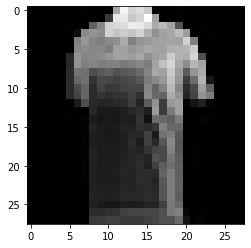

In [85]:
imageTestBatch, labelTestBatch = next(iter(testloader))
plt.imshow(imageTestBatch[0][0].numpy(), cmap='gray')

predictionTest = model.forward(imageTestBatch[0].view(1, -1))

with torch.no_grad():
    ps = F.softmax(predictionTest, dim = 1)
    
    maximum = torch.max(ps)
    itemIndex = (ps == maximum).nonzero()[0][1].item()
    print(f"Model prediction: {itemArray[itemIndex]}, probability: {maximum}")
    
    result = ps.topk(1, dim=1) #Returns the top 1 value of the tensor. if 2 is used instead of 1, it returns the 2 highests.
    print(f"Model prediction using the topk method: {itemArray[result[1].item()]}, probability: {result[0].item()}")
    